# TSAI Assignment 7 - Code 5

### Model5:
###### Target
Reduce Parameters + Improve accuracy
(Try to reduce parameters from 7k to 6k by reducing channel size. Use batch normalisation to achieve better accuracy)
###### Result
Model parameters - 5,438
Train Accuracy - 99.43%
Validation Accuracy - 99.02%
##### Analysis
Best so far! Batch Normalisation Rocks!!

In [1]:
from utils import torch,nn,F,optim,datasets,transforms
import utils

Create Train and test Transforms - use utils module

In [2]:
# Data transformation parameters
mean = 0.1307
std_dev = 0.3081

#Get train data transformation
train_transforms = utils.getTrainTransforms(mean,std_dev)

#Get Test data transformations
test_transforms = utils.getTestTransforms(mean,std_dev)

Get the MNIST data - train dataset and test dataset

In [3]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

Get the train_loader and test_loader -  batches of data used in model training/testing

In [4]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)

## MODEL - 2

In [5]:
from models import model_5
myNextModel = model_5.getModel()

In [6]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

optimizer = optim.SGD(myNextModel.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  tr_Acc, tr_loss = utils.train(myNextModel, train_loader, optimizer, criterion)
  tst_acc, tst_loss = utils.test(myNextModel, test_loader, criterion)
  train_acc.append(tr_Acc)
  train_losses.append(tr_loss)
  test_acc.append(tst_acc)
  test_losses.append(tst_loss)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]D:\SRT_Courses\MachineLearning\TSAI\Session7\S7\models\model_5.py:52: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Train: Loss=0.1920 Batch_id=117 Accuracy=82.28: 100%|████████████████████████████████| 118/118 [00:18<00:00,  6.52it/s]


Test set: Average loss: 0.1732, Accuracy: 9650/10000 (96.50%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1284 Batch_id=117 Accuracy=96.82: 100%|████████████████████████████████| 118/118 [00:08<00:00, 14.19it/s]


Test set: Average loss: 0.0944, Accuracy: 9779/10000 (97.79%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1010 Batch_id=117 Accuracy=97.76: 100%|████████████████████████████████| 118/118 [00:08<00:00, 14.17it/s]


Test set: Average loss: 0.0726, Accuracy: 9809/10000 (98.09%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0581 Batch_id=117 Accuracy=98.06: 100%|████████████████████████████████| 118/118 [00:08<00:00, 14.00it/s]


Test set: Average loss: 0.0643, Accuracy: 9813/10000 (98.13%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0414 Batch_id=117 Accuracy=98.43: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.85it/s]


Test set: Average loss: 0.0499, Accuracy: 9863/10000 (98.63%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0801 Batch_id=117 Accuracy=98.59: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.98it/s]


Test set: Average loss: 0.0500, Accuracy: 9857/10000 (98.57%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0315 Batch_id=117 Accuracy=98.65: 100%|████████████████████████████████| 118/118 [00:08<00:00, 14.29it/s]


Test set: Average loss: 0.0489, Accuracy: 9866/10000 (98.66%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0372 Batch_id=117 Accuracy=98.80: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.91it/s]


Test set: Average loss: 0.0442, Accuracy: 9877/10000 (98.77%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0255 Batch_id=117 Accuracy=98.92: 100%|████████████████████████████████| 118/118 [00:08<00:00, 14.11it/s]


Test set: Average loss: 0.0427, Accuracy: 9878/10000 (98.78%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0297 Batch_id=117 Accuracy=98.97: 100%|████████████████████████████████| 118/118 [00:08<00:00, 14.34it/s]


Test set: Average loss: 0.0391, Accuracy: 9887/10000 (98.87%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0387 Batch_id=117 Accuracy=99.01: 100%|████████████████████████████████| 118/118 [00:08<00:00, 14.17it/s]


Test set: Average loss: 0.0382, Accuracy: 9891/10000 (98.91%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0259 Batch_id=117 Accuracy=99.04: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.49it/s]


Test set: Average loss: 0.0413, Accuracy: 9874/10000 (98.74%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0180 Batch_id=117 Accuracy=99.09: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.99it/s]


Test set: Average loss: 0.0384, Accuracy: 9890/10000 (98.90%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0196 Batch_id=117 Accuracy=99.11: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.85it/s]


Test set: Average loss: 0.0351, Accuracy: 9900/10000 (99.00%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0388 Batch_id=117 Accuracy=99.19: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.67it/s]


Test set: Average loss: 0.0342, Accuracy: 9902/10000 (99.02%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0106 Batch_id=117 Accuracy=99.38: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.43it/s]


Test set: Average loss: 0.0324, Accuracy: 9910/10000 (99.10%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0197 Batch_id=117 Accuracy=99.39: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.91it/s]


Test set: Average loss: 0.0317, Accuracy: 9912/10000 (99.12%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0476 Batch_id=117 Accuracy=99.42: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.98it/s]


Test set: Average loss: 0.0316, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0819 Batch_id=117 Accuracy=99.44: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.93it/s]


Test set: Average loss: 0.0315, Accuracy: 9918/10000 (99.18%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0291 Batch_id=117 Accuracy=99.44: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.38it/s]


Test set: Average loss: 0.0321, Accuracy: 9912/10000 (99.12%)

Adjusting learning rate of group 0 to 1.0000e-03.


Print the model summary to know your model

In [7]:
utils.printModelSummary(myNextModel,(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 26, 26]              40
              ReLU-2            [-1, 4, 26, 26]               0
       BatchNorm2d-3            [-1, 4, 26, 26]               8
            Conv2d-4            [-1, 4, 24, 24]             148
              ReLU-5            [-1, 4, 24, 24]               0
       BatchNorm2d-6            [-1, 4, 24, 24]               8
         MaxPool2d-7            [-1, 4, 12, 12]               0
            Conv2d-8            [-1, 8, 10, 10]             296
              ReLU-9            [-1, 8, 10, 10]               0
      BatchNorm2d-10            [-1, 8, 10, 10]              16
           Conv2d-11              [-1, 8, 8, 8]             584
             ReLU-12              [-1, 8, 8, 8]               0
      BatchNorm2d-13              [-1, 8, 8, 8]              16
           Conv2d-14              [-1, 

Plot the train and test accuracy

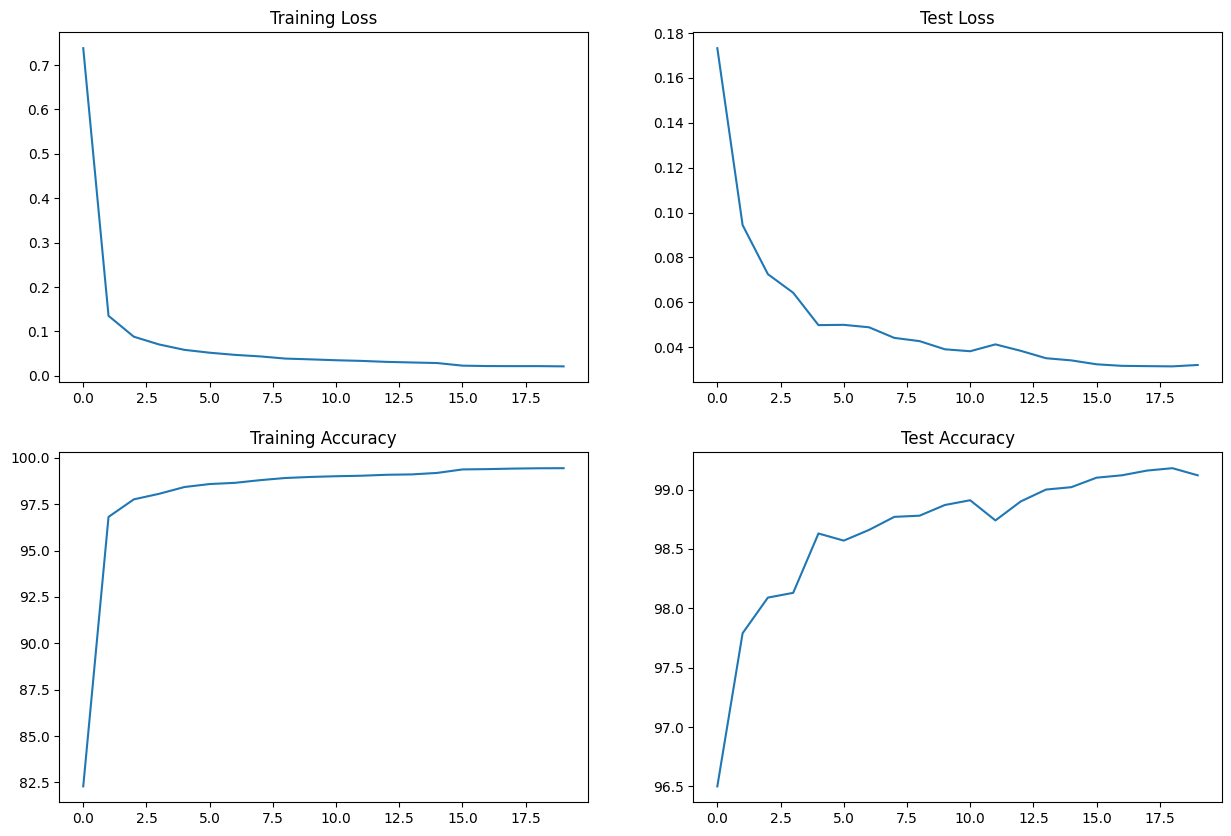

In [8]:
utils.printModelTrainTestAccuracy(train_acc, train_losses, test_acc, test_losses)